In [1]:
from sshtunnel import SSHTunnelForwarder
import psycopg2
import os
import pandas as pd

# SSH connection details.
ssh_host = 'loki.research.cs.dal.ca'
ssh_port = 22
ssh_username = os.getenv('LOKI_USERNAME')
ssh_password = os.getenv('LOKI_PASSWORD')

# Database connection details.
db_host = '127.0.0.1'
db_port = 5432
db_name = 'staging_db'
db_user = os.getenv('STAGING_DB_USERNAME')
db_password = os.getenv('STAGING_DB_PASSWORD')

# Establish SSH tunnel and connect to PostgreSQL.
try:
    with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_username,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', db_port)  # Forwarding PostgreSQL port.
    ) as tunnel:
    
        # Connect to PostgreSQL database through the SSH tunnel.
        conn = psycopg2.connect(
            host=db_host,
            port=tunnel.local_bind_port,  # use the local port set by the tunnel.
            dbname=db_name,
            user=db_user,
            password=db_password
        )
        
        print("Database connection established")
        
        activity_query = "SELECT * FROM study_prositvd.activity;"
        df_activity = pd.read_sql_query(activity_query, conn)
        
        # Close database connection.
        conn.close()

except Exception as e:
    print(f"An error occurred: {e}")

Database connection established


In [2]:
df_activity.head()

,_id,participantid,measuredat,uploadedat,value0
0,YMyjC5fcmhpSAe2Wm,prositvd129,2023-04-05 20:52:24,2023-04-05 22:10:08.572,"isStationary, 0, isWalking, 0, isRunning, 0, i..."
1,aAxsPnf2aYv7rYh9R,prositvd129,2023-04-05 20:52:26,2023-04-05 22:10:08.572,"isStationary, 1, isWalking, 0, isRunning, 0, i..."
2,pxBC9zpFuwm9NBDCK,prositvd129,2023-04-05 20:52:27,2023-04-05 22:10:08.572,"isStationary, 0, isWalking, 0, isRunning, 0, i..."
3,EEcHYgG8hAg5L7XAC,prositvd129,2023-04-05 20:52:28,2023-04-05 22:10:08.572,"isStationary, 1, isWalking, 0, isRunning, 0, i..."
4,KQ8ZDgnLqZbgDPRsH,prositvd129,2023-04-05 20:52:28,2023-04-05 22:10:08.572,"isStationary, 0, isWalking, 0, isRunning, 0, i..."


In [3]:
for i in enumerate(df_activity['value0'][0].split(', ')):
    print(i)

(0, 'isStationary')
(1, '0')
(2, 'isWalking')
(3, '0')
(4, 'isRunning')
(5, '0')
(6, 'isInVehicle')
(7, '0')
(8, 'isCycling')
(9, '0')
(10, 'isActivityUnknown')
(11, '1')
(12, 'Confidence')
(13, 'High')


In [4]:
df_activity['is_stationary']        = df_activity['value0'].apply(lambda x: int(x.split(', ')[1]))
df_activity['is_walking']           = df_activity['value0'].apply(lambda x: int(x.split(', ')[3]))
df_activity['is_running']           = df_activity['value0'].apply(lambda x: int(x.split(', ')[5]))
df_activity['is_in_vehicle']        = df_activity['value0'].apply(lambda x: int(x.split(', ')[7]))
df_activity['is_cycling']           = df_activity['value0'].apply(lambda x: int(x.split(', ')[9]))
df_activity['is_activity_unknown']  = df_activity['value0'].apply(lambda x: int(x.split(', ')[11]))
df_activity['confidence']           = df_activity['value0'].apply(lambda x: 1 if x.split(', ')[13] == 'High' else 0)
df_activity.drop('_id', axis=1, inplace=True)
df_activity.drop('value0', axis=1, inplace=True)

In [5]:
df_activity.head(50)

,participantid,measuredat,uploadedat,is_stationary,is_walking,is_running,is_in_vehicle,is_cycling,is_activity_unknown,confidence
0,prositvd129,2023-04-05 20:52:24,2023-04-05 22:10:08.572,0,0,0,0,0,1,1
1,prositvd129,2023-04-05 20:52:26,2023-04-05 22:10:08.572,1,0,0,0,0,0,0
2,prositvd129,2023-04-05 20:52:27,2023-04-05 22:10:08.572,0,0,0,0,0,1,1
3,prositvd129,2023-04-05 20:52:28,2023-04-05 22:10:08.572,1,0,0,0,0,0,0
4,prositvd129,2023-04-05 20:52:28,2023-04-05 22:10:08.572,0,0,0,0,0,1,1
5,prositvd129,2023-04-05 20:52:29,2023-04-05 22:10:08.572,1,0,0,0,0,0,0
6,prositvd129,2023-04-05 20:52:30,2023-04-05 22:10:08.572,0,0,0,0,0,1,1
7,prositvd129,2023-04-05 20:52:31,2023-04-05 22:10:08.572,1,0,0,0,0,0,0
8,prositvd129,2023-04-05 20:52:33,2023-04-05 22:10:08.572,0,0,0,0,0,1,1
9,prositvd129,2023-04-05 20:52:33,2023-04-05 22:10:08.572,1,0,0,0,0,0,0


In [6]:
# Filter out rows with low confidence and unknown activities.
df_known_confident = df_activity[(df_activity.is_activity_unknown == 0) & (df_activity.confidence == 1)]

In [7]:
print(f"Stationary count: {df_known_confident[(df_known_confident.is_stationary == 0)].shape[0]}")
print(f"Non-stationary count: {df_known_confident[(df_known_confident.is_stationary == 1)].shape[0]}")

Stationary count: 266028
Non-stationary count: 595798


In [8]:
participant_ids = df_known_confident['participantid'].drop_duplicates()

In [9]:
type(participant_ids)

pandas.core.series.Series

In [10]:
# Are there any rows that's stationary without being in a vehicle (because it's possible to be stationary while being in a vehicle), however, it's also either walking or running or cycling? If so, then the dataset is not consistent.
inconsistent_dataset = df_known_confident[(df_known_confident.is_stationary == 1) & (df_known_confident.is_in_vehicle == 0) & ((df_known_confident.is_walking == 1) | (df_known_confident.is_running == 1) | (df_known_confident.is_cycling == 1))].shape[0] > 0
if not inconsistent_dataset:
    print("Dataset is consistent")
else:
    print("Dataset is inconsistent")

Dataset is consistent


In [11]:
# Experiment with one participant.
participant_ids_list = participant_ids.tolist()
participant_id = participant_ids_list[2]

df = df_known_confident[df_known_confident.participantid == participant_id]

In [12]:
participant_id

'prositvd164'

In [13]:
df.drop('uploadedat', axis=1, inplace=True)

In [14]:
df['is_active'] = (df['is_stationary'].apply(lambda x: x == 1) & df['is_in_vehicle'].apply(lambda x: x == 0)).apply(lambda x: 0 if x else 1)

In [15]:
df.drop('is_stationary', axis=1, inplace=True)
df.drop('is_walking', axis=1, inplace=True)
df.drop('is_running', axis=1, inplace=True)
df.drop('is_in_vehicle', axis=1, inplace=True)
df.drop('is_cycling', axis=1, inplace=True)
df.drop('is_activity_unknown', axis=1, inplace=True)
df.drop('confidence', axis=1, inplace=True)

In [16]:
df.drop('participantid', axis=1, inplace=True)

In [17]:
df

,measuredat,is_active
98723,2023-07-11 10:30:35,0
98730,2023-07-11 10:35:27,0
98736,2023-07-11 10:39:55,0
98763,2023-07-11 10:41:46,0
98764,2023-07-11 10:41:59,0
...,...,...
142147,2023-07-01 19:18:10,1
142160,2023-07-01 20:23:09,1
142161,2023-07-01 20:24:20,1
142163,2023-07-01 20:24:25,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8031 entries, 98723 to 142167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   measuredat  8031 non-null   datetime64[ns]
 1   is_active   8031 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 188.2 KB


In [20]:
# Extract sorted timestamps where `is_active` is 1
active_timestamps = df[df['is_active'] == 1].sort_values(by='measuredat')['measuredat'].tolist()

In [21]:
active_timestamps

[Timestamp('2023-06-20 23:07:58'),
 Timestamp('2023-06-20 23:10:51'),
 Timestamp('2023-06-20 23:10:58'),
 Timestamp('2023-06-20 23:11:01'),
 Timestamp('2023-06-20 23:11:17'),
 Timestamp('2023-06-20 23:11:26'),
 Timestamp('2023-06-20 23:11:29'),
 Timestamp('2023-06-20 23:14:27'),
 Timestamp('2023-06-20 23:14:39'),
 Timestamp('2023-06-20 23:14:42'),
 Timestamp('2023-06-20 23:14:48'),
 Timestamp('2023-06-20 23:14:50'),
 Timestamp('2023-06-20 23:14:58'),
 Timestamp('2023-06-20 23:15:28'),
 Timestamp('2023-06-20 23:16:17'),
 Timestamp('2023-06-20 23:16:24'),
 Timestamp('2023-06-20 23:16:34'),
 Timestamp('2023-06-22 00:38:31'),
 Timestamp('2023-06-22 00:42:43'),
 Timestamp('2023-06-22 00:43:24'),
 Timestamp('2023-06-22 00:43:28'),
 Timestamp('2023-06-22 00:43:35'),
 Timestamp('2023-06-22 00:43:38'),
 Timestamp('2023-06-22 00:43:59'),
 Timestamp('2023-06-22 00:44:00'),
 Timestamp('2023-06-22 00:44:35'),
 Timestamp('2023-06-22 00:47:56'),
 Timestamp('2023-06-22 00:48:03'),
 Timestamp('2023-06-

### Extract Active Windows

In [23]:
from datetime import timedelta

# Define the inactive threshold
inactive_threshold = timedelta(minutes=30)

# Initialize empty list to store active windows
active_windows = []

# Initialize the first window
start_time = active_timestamps[0]
end_time = active_timestamps[0]

# Iterate through the timestamps
for i in range(1, len(active_timestamps)):
    current_time = active_timestamps[i]
    previous_time = active_timestamps[i - 1]
    
    # If the difference is greater than the inactive threshold, close the current window
    if current_time - previous_time > inactive_threshold:
        active_windows.append((start_time, end_time))
        start_time = current_time  # Start a new window
    
    end_time = current_time  # Update end time for the current window

# Append the last window
active_windows.append((start_time, end_time))

In [24]:
print(active_windows)

[(Timestamp('2023-06-20 23:07:58'), Timestamp('2023-06-20 23:16:34')), (Timestamp('2023-06-22 00:38:31'), Timestamp('2023-06-22 00:48:56')), (Timestamp('2023-06-22 19:43:44'), Timestamp('2023-06-22 19:43:44')), (Timestamp('2023-06-23 11:48:59'), Timestamp('2023-06-23 11:50:46')), (Timestamp('2023-06-23 14:56:21'), Timestamp('2023-06-23 15:04:19')), (Timestamp('2023-06-23 15:47:00'), Timestamp('2023-06-23 15:48:40')), (Timestamp('2023-06-24 12:44:10'), Timestamp('2023-06-24 12:44:11')), (Timestamp('2023-06-24 19:53:33'), Timestamp('2023-06-24 21:00:31')), (Timestamp('2023-06-24 23:25:49'), Timestamp('2023-06-24 23:34:19')), (Timestamp('2023-06-25 02:55:09'), Timestamp('2023-06-25 02:55:17')), (Timestamp('2023-06-25 12:27:07'), Timestamp('2023-06-25 12:27:11')), (Timestamp('2023-06-25 13:35:43'), Timestamp('2023-06-25 14:01:16')), (Timestamp('2023-06-25 14:38:13'), Timestamp('2023-06-25 14:45:13')), (Timestamp('2023-06-25 15:18:08'), Timestamp('2023-06-25 15:26:39')), (Timestamp('2023-06

In [25]:
# Create the list of inactive windows
inactive_windows = []

# Start with the first inactive window, which starts at the end of the first active window
prev_end = active_windows[0][1]

for window in active_windows[1:]:
    current_start = window[0]
    
    # If there’s a gap between two active windows, it becomes an inactive window
    if current_start - prev_end > timedelta(seconds=0):
        inactive_windows.append((prev_end, current_start))
    
    # Update previous window end
    prev_end = window[1]

In [26]:
print(inactive_windows)

[(Timestamp('2023-06-20 23:16:34'), Timestamp('2023-06-22 00:38:31')), (Timestamp('2023-06-22 00:48:56'), Timestamp('2023-06-22 19:43:44')), (Timestamp('2023-06-22 19:43:44'), Timestamp('2023-06-23 11:48:59')), (Timestamp('2023-06-23 11:50:46'), Timestamp('2023-06-23 14:56:21')), (Timestamp('2023-06-23 15:04:19'), Timestamp('2023-06-23 15:47:00')), (Timestamp('2023-06-23 15:48:40'), Timestamp('2023-06-24 12:44:10')), (Timestamp('2023-06-24 12:44:11'), Timestamp('2023-06-24 19:53:33')), (Timestamp('2023-06-24 21:00:31'), Timestamp('2023-06-24 23:25:49')), (Timestamp('2023-06-24 23:34:19'), Timestamp('2023-06-25 02:55:09')), (Timestamp('2023-06-25 02:55:17'), Timestamp('2023-06-25 12:27:07')), (Timestamp('2023-06-25 12:27:11'), Timestamp('2023-06-25 13:35:43')), (Timestamp('2023-06-25 14:01:16'), Timestamp('2023-06-25 14:38:13')), (Timestamp('2023-06-25 14:45:13'), Timestamp('2023-06-25 15:18:08')), (Timestamp('2023-06-25 15:26:39'), Timestamp('2023-06-25 17:38:54')), (Timestamp('2023-06

In [27]:
# Function to calculate total active duration
def get_total_active_duration(start, end, windows):
    total_duration = timedelta(seconds=0)
    for window in windows:
        window_start, window_end = window
        if window_end >= start and window_start <= end:
            overlap_start = max(window_start, start)
            overlap_end = min(window_end, end)
            total_duration += overlap_end - overlap_start
    return total_duration

# Function to calculate total inactive duration
def get_total_inactive_duration(start, end, windows):
    total_duration = timedelta(seconds=0)
    for window in windows:
        window_start, window_end = window
        if window_end >= start and window_start <= end:
            overlap_start = max(window_start, start)
            overlap_end = min(window_end, end)
            total_duration += overlap_end - overlap_start
    return total_duration

In [28]:
# First date for this participant.
print("First date: ", min(active_windows[0][0], inactive_windows[0][0]))
print("Last date: ", max(active_windows[-1][-1], inactive_windows[-1][-1]))

First date:  2023-06-20 23:07:58
Last date:  2023-08-11 20:21:46


In [139]:
# Define the start and end timestamps
start_timestamp = pd.Timestamp('2022-11-12 21:00:00')
end_timestamp = pd.Timestamp('2022-11-13 09:00:00')

# Calculate total active duration between the start and end timestamps
total_active_duration = get_total_active_duration(start_timestamp, end_timestamp, active_windows)

# Calculate total inactive duration between the start and end timestamps
total_inactive_duration = get_total_inactive_duration(start_timestamp, end_timestamp, inactive_windows)

# Print results
print(f"Total Active Duration: {total_active_duration}")
print(f"Total Inactive Duration: {total_inactive_duration}")

Total Active Duration: 0 days 01:54:05
Total Inactive Duration: 0 days 10:05:55


In [137]:
import matplotlib.pyplot as plt
import numpy as np

def plot_circular_active_only(df):
    """
    This function creates a circular plot where each concentric circle represents a day.
    Red dots represent active periods. Inactive periods are not plotted.
    The plot is labeled like a 24-hour clock, and each circle is labeled with the date.
    The legend is for the active state only.
    
    Args:
    - df: A DataFrame containing 'measuredat' and 'is_active' columns.
    """
    # Extract date and hour from 'measuredat' and group by date
    df['date'] = df['measuredat'].dt.date
    df['hour'] = df['measuredat'].dt.hour + df['measuredat'].dt.minute / 60  # Convert to fractional hours
    grouped = df.groupby('date', sort=False)  # Preserve the order of the dates

    # Set up the figure and axis for polar plotting
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
    ax.set_theta_direction(-1)  # Clockwise
    ax.set_theta_offset(np.pi / 2)  # Start the clock at 12 o'clock (top)

    # Plot concentric circles for each day, first day being the innermost circle
    for i, (date, group) in enumerate(grouped):
        # Filter only active periods (is_active == 1)
        active_group = group[group['is_active'] == 1]
        
        # Convert time (hour) to radians (for the 24-hour clock format)
        theta = (active_group['hour'] / 24) * 2 * np.pi  # Map 24-hour time to 2*pi radians
        
        # Set the radius for each circle based on the day index
        r = np.ones(len(active_group)) * (i + 1)  # Concentric circles for each day
        
        # Plot only the active points (red dots)
        ax.scatter(theta, r, c='red')

        # Add date labels at the beginning of each circle (radial position)
        ax.text(0, i + 1, date.strftime('%Y-%m-%d'), ha='center', va='center', color='cyan')

    # Set the clock-like time labels (hours from 0 to 24)
    hours = np.linspace(0, 2 * np.pi, 24, endpoint=False)
    ax.set_xticks(hours)
    ax.set_xticklabels([f'{int(hr)}:00' for hr in np.linspace(0, 24, 24, endpoint=False)])

    # Add a legend only for active periods
    ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Active')],
              loc='upper right', bbox_to_anchor=(1.2, 1))

    # Add a title
    ax.set_title('Circular Plot of Active Periods by Day (Clock Format)')
    
    # Remove radial ticks (y-ticks) as they represent days
    ax.set_yticklabels([])

    plt.show()

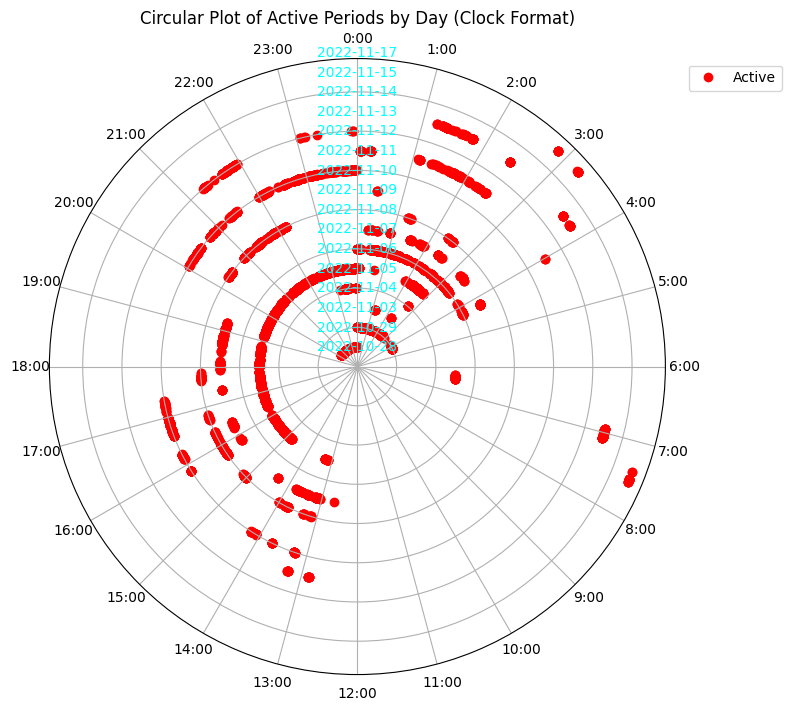

In [138]:
plot_circular_active_only(df)